<a href="https://colab.research.google.com/github/tabaraei/CheatSheet/blob/master/notebooks/Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [ ]:
%pip install streamlit

In [ ]:
!streamlit --help
!streamlit run app.py --server.port 8501
!streamlit hello
!streamlit config show
!streamlit cache clear
!streamlit docs
!streamlit --version

In [ ]:
import streamlit as st

## Interactive Widgets

In [ ]:
st.button('Hit me')

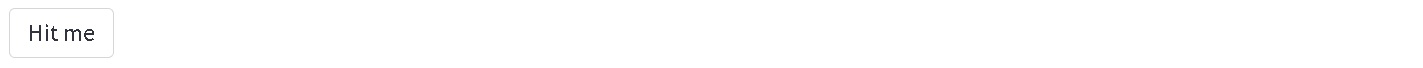

In [ ]:
st.radio('Radio', [1,2,3])

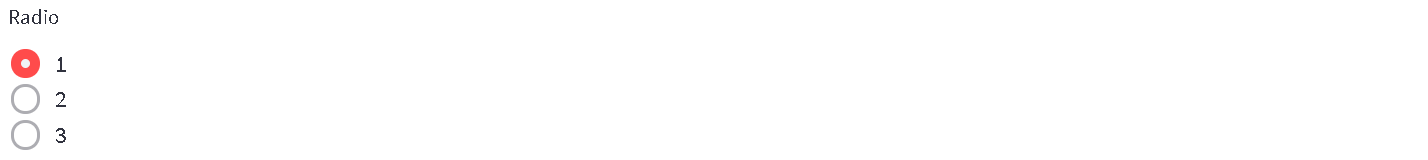

In [ ]:
st.checkbox('Check me out')

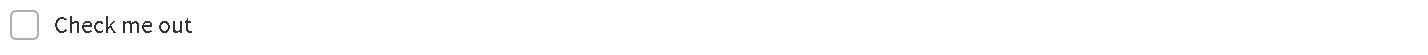

In [ ]:
st.slider('Slide me', min_value=0, max_value=10)
st.select_slider('Slide to select', options=['a', 'b', 'c'])

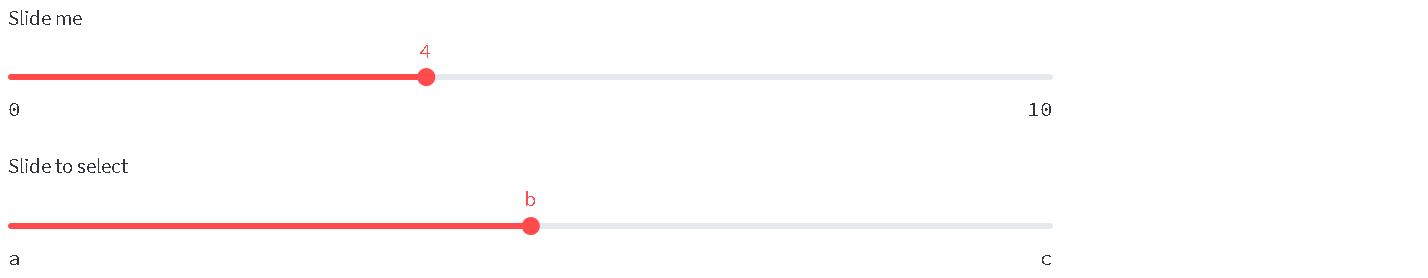

In [ ]:
st.selectbox('Select', [1,2,3])
st.multiselect('Multiselect', [1,2,3])

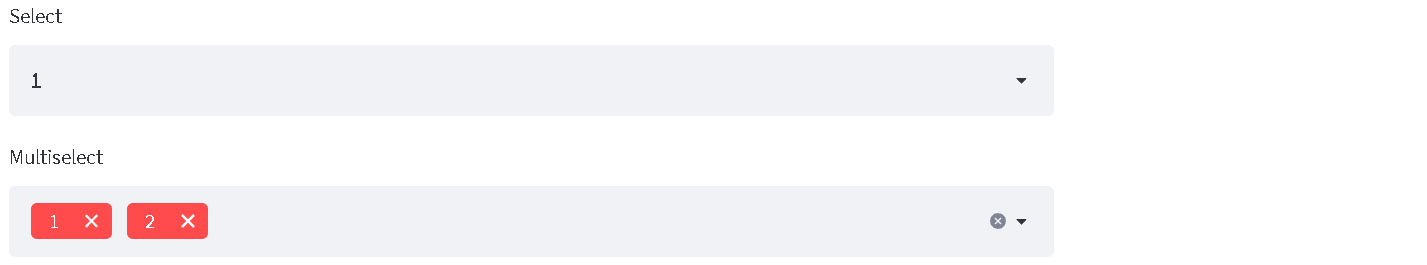

In [ ]:
st.number_input('Enter a number')
st.text_input('Enter some text')
st.text_area('Area for textual entry')

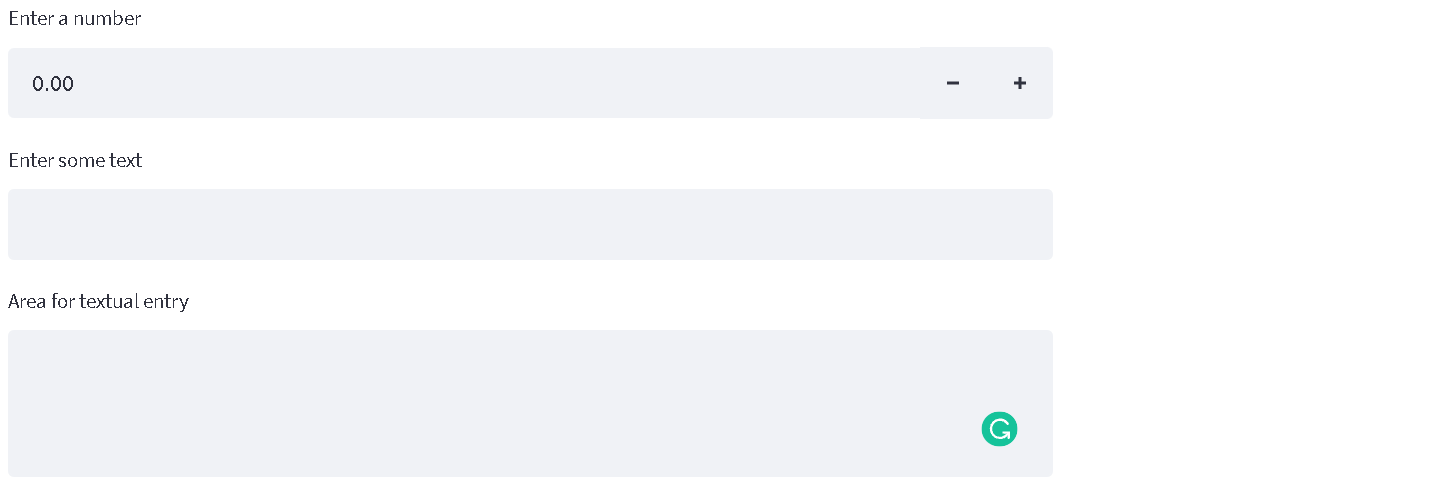

In [ ]:
st.date_input('Date input')
st.time_input('Time entry')

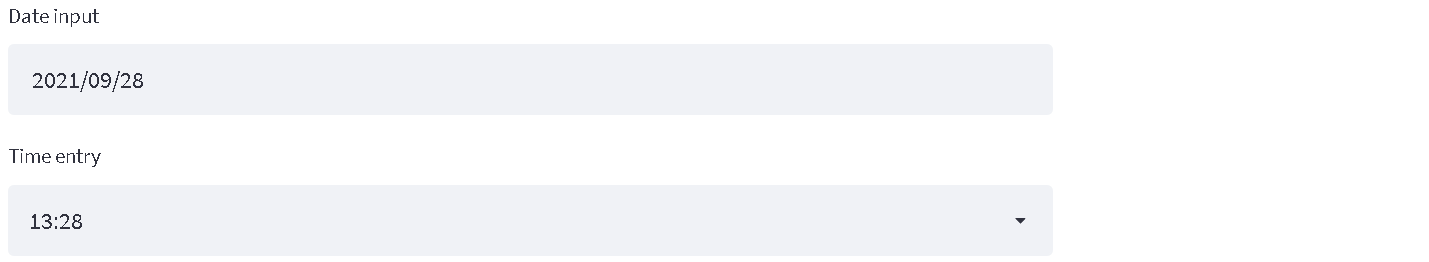

In [ ]:
st.file_uploader('File uploader')

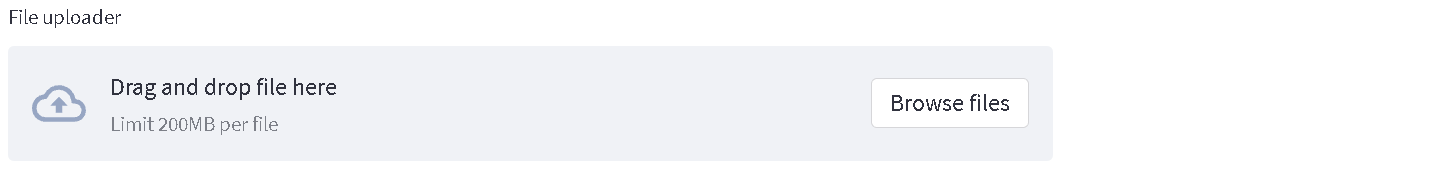

In [ ]:
st.color_picker('Pick a color')

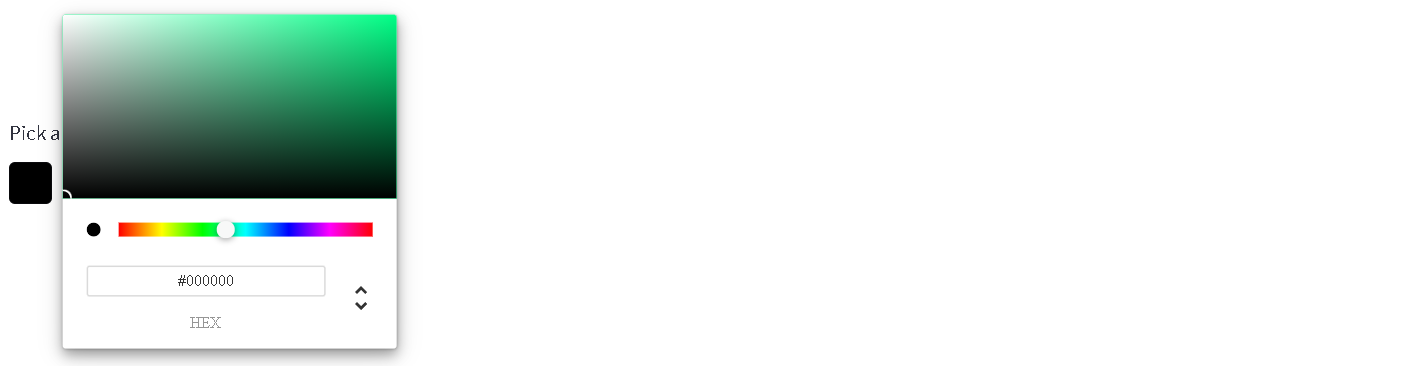

## Text Formatting

In [ ]:
st.title('My title')
st.header('My header')
st.subheader('My sub')
st.markdown('_Markdown_') # unsafe_allow_html=True
st.text('Fixed width text')
st.write('You can write almost any object')
st.caption('This is a small text')

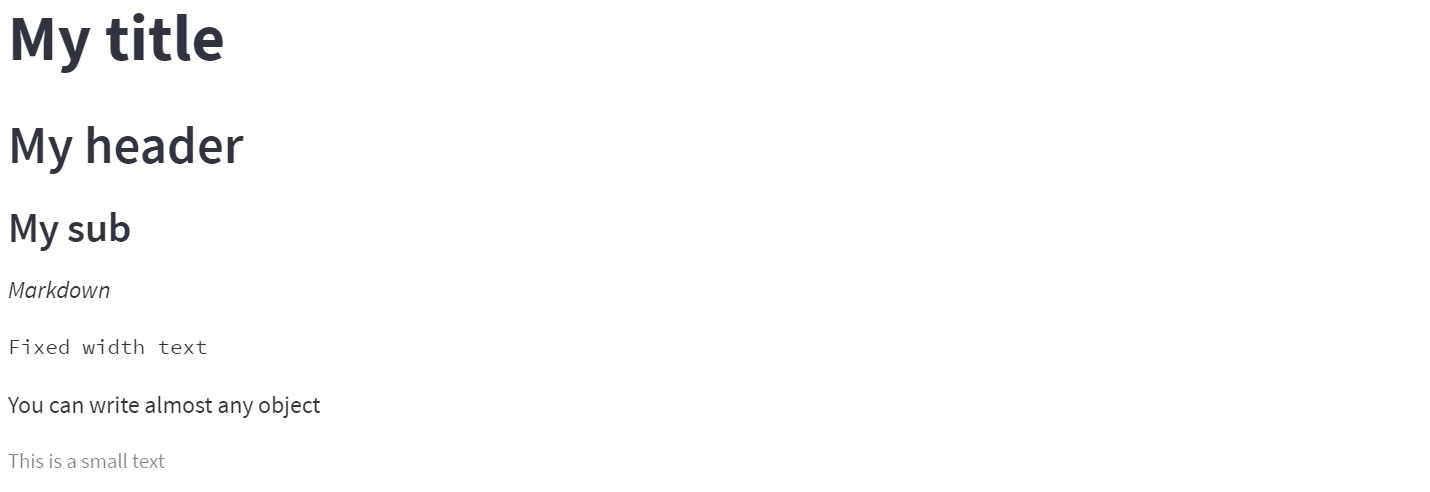

In [ ]:
st.latex(r'e^{i\pi} + 1 = 0')

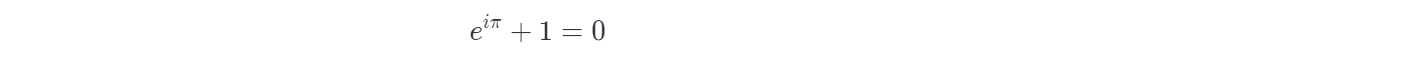

In [ ]:
st.code('for i in range(8): foo()')

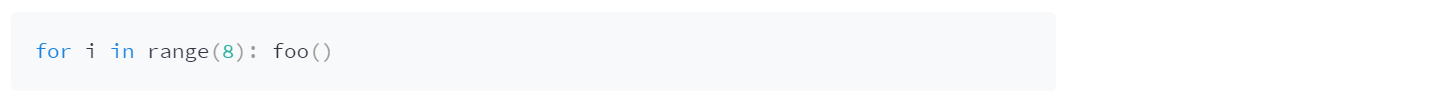

In [ ]:
with st.echo():
    st.write('Code will be executed and printed')

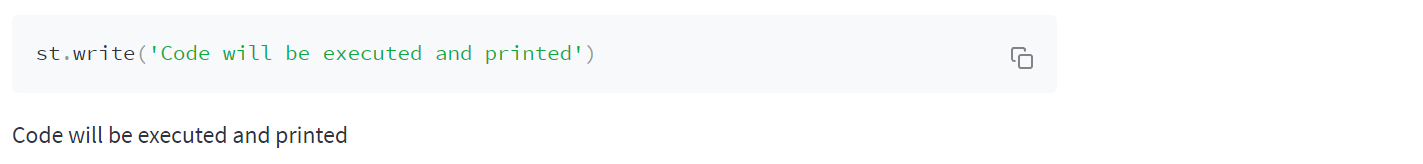

## Progress and Status

In [ ]:
st.error('Error message')
st.warning('Warning message')
st.info('Info message')
st.success('Success message')
st.exception(e)

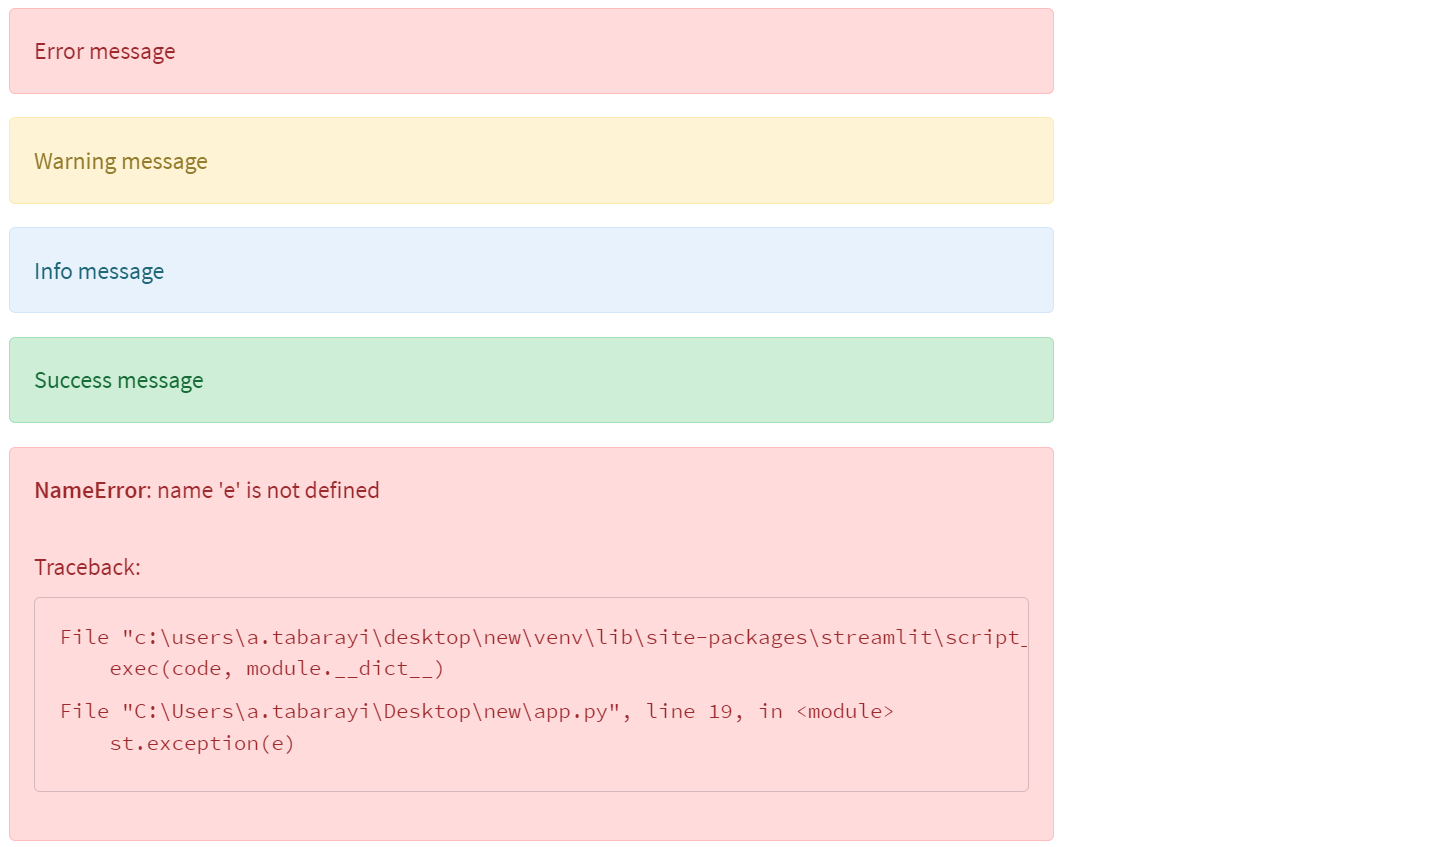

In [ ]:
st.balloons()

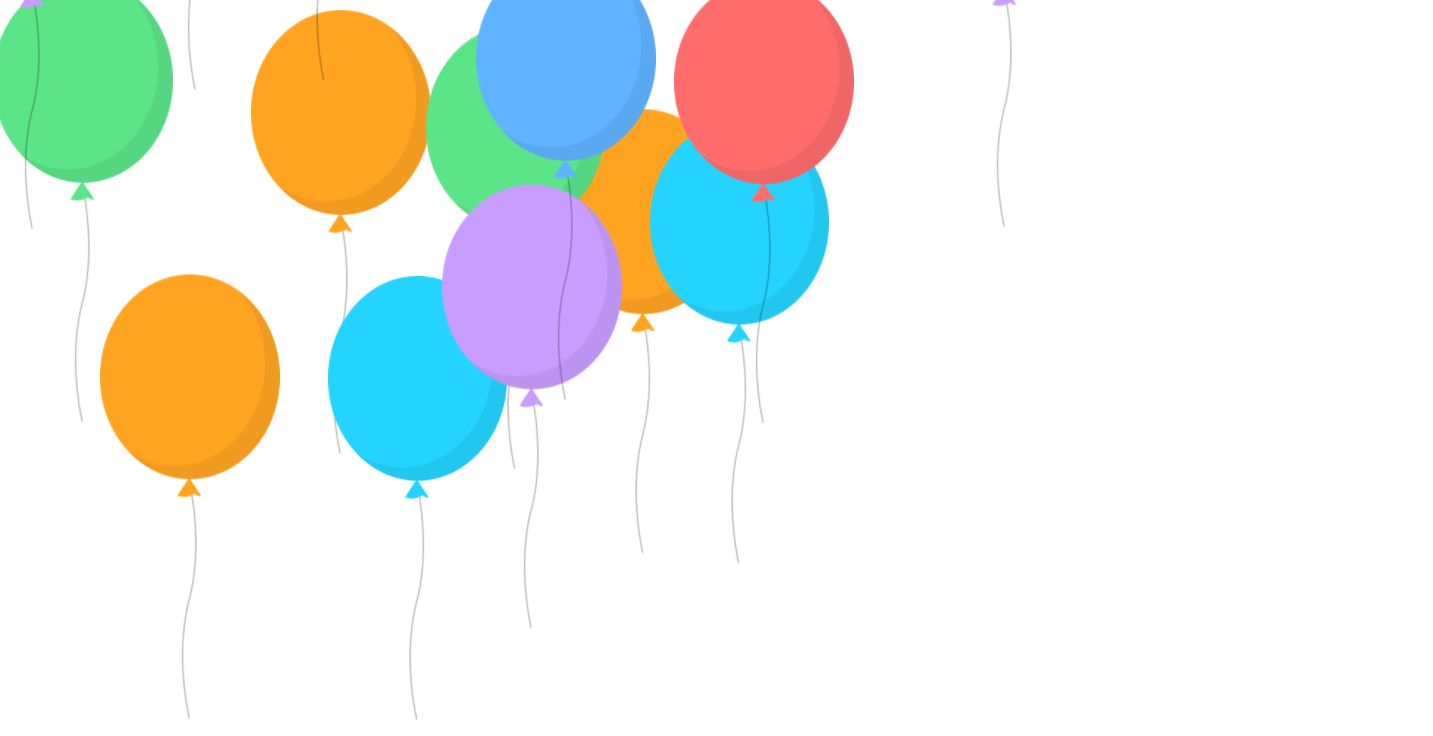

In [ ]:
st.progress(25)

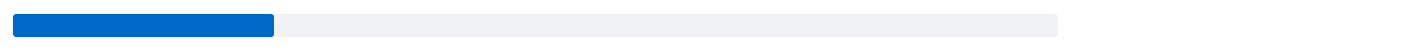

In [ ]:
import time

# shows a text message, then disappears after code block being executed.
with st.spinner(text='In progress'):
    time.sleep(5)

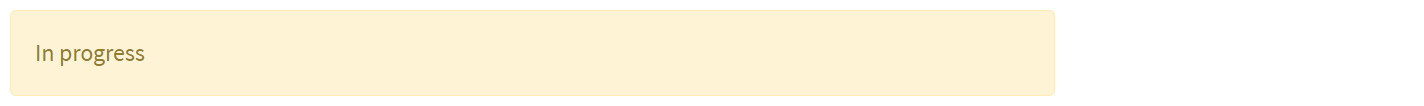

## Data

In [ ]:
%pip install pandas==1.2.4

In [ ]:
import pandas as pd

data = {'foo': [1,2], 'bar': [3,4]}
df = pd.DataFrame(data)

In [ ]:
st.json(data)

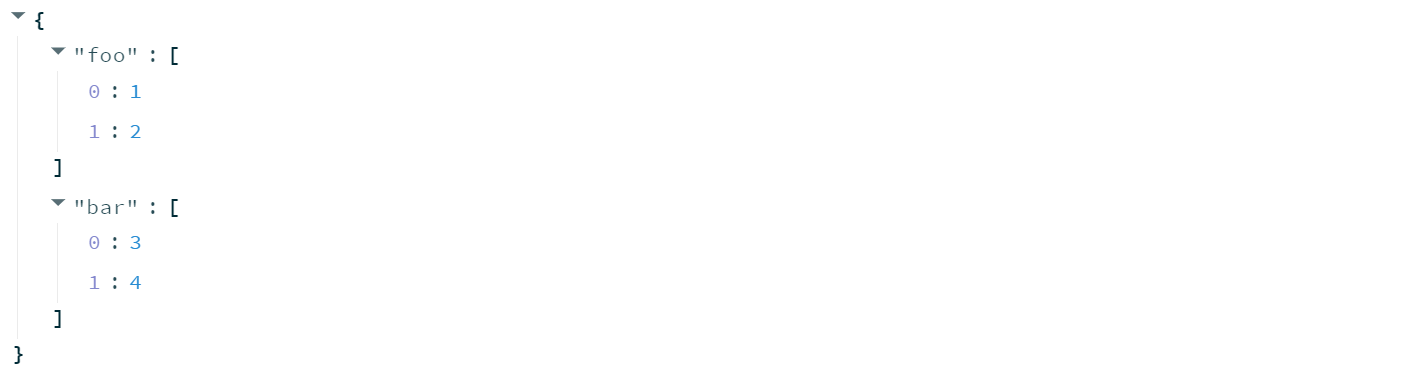

In [ ]:
st.dataframe(df)

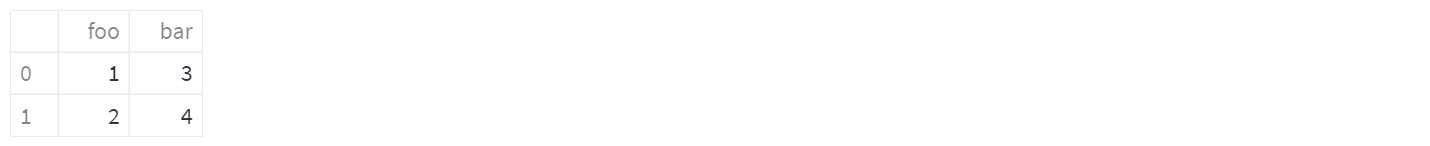

In [ ]:
st.table(df)

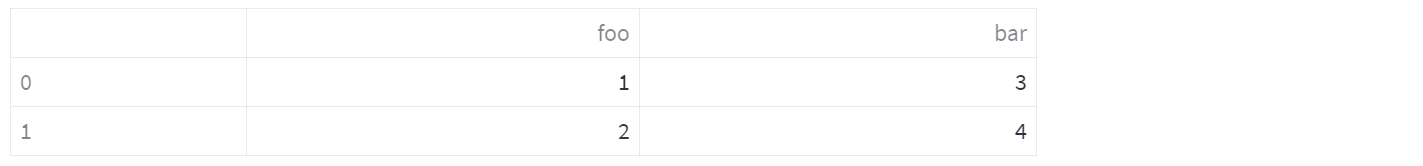

## Chart

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
sns.set_style('darkgrid')


df1 = pd.DataFrame(
    index=pd.date_range('2021-01-01', periods=24, freq='H'),
    data=np.random.randn(24, 3),
    columns=['a', 'b', 'c']
)

df2 = sns.load_dataset('mpg')

df3 = pd.DataFrame({
    'Group 1': np.random.randn(200)-2,
    'Group 2': np.random.randn(200),
    'Group 3': np.random.randn(200)+2
})

In [ ]:
st.line_chart(df1)

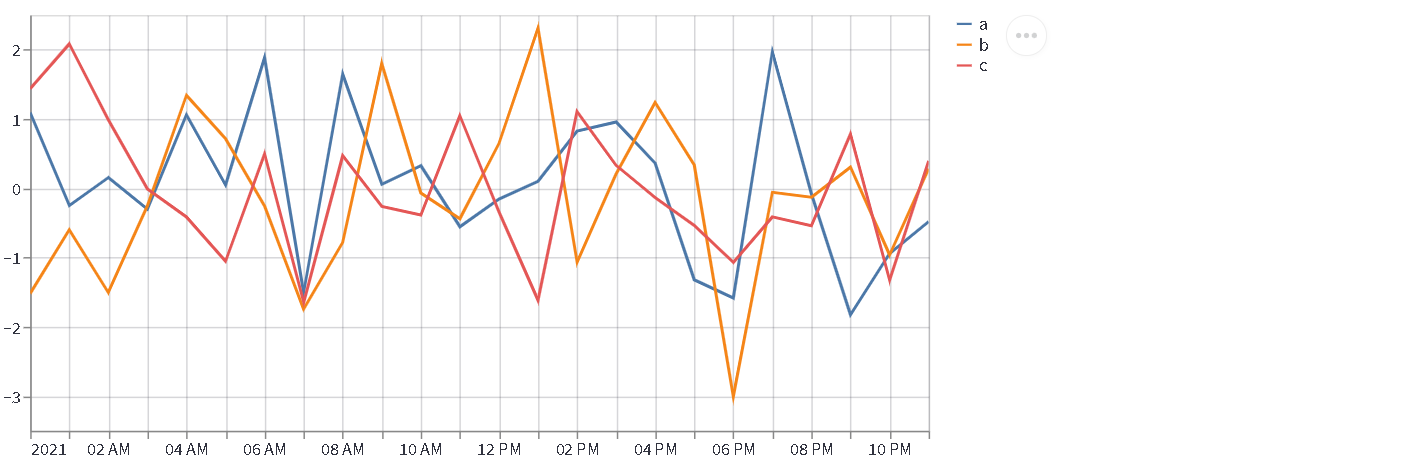

In [ ]:
st.area_chart(df1)

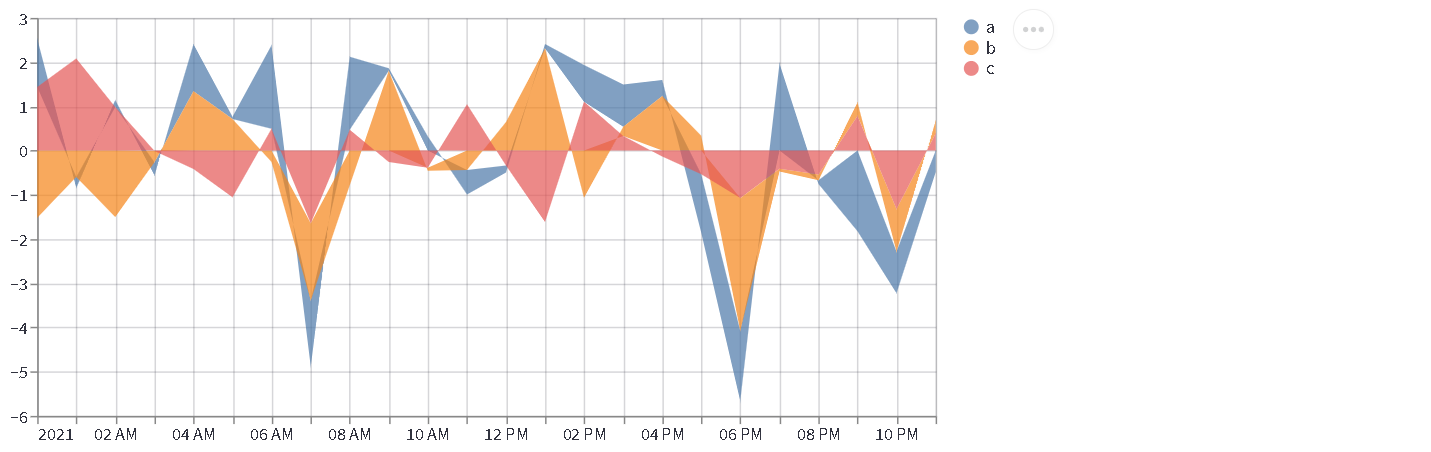

In [ ]:
st.bar_chart(df1)

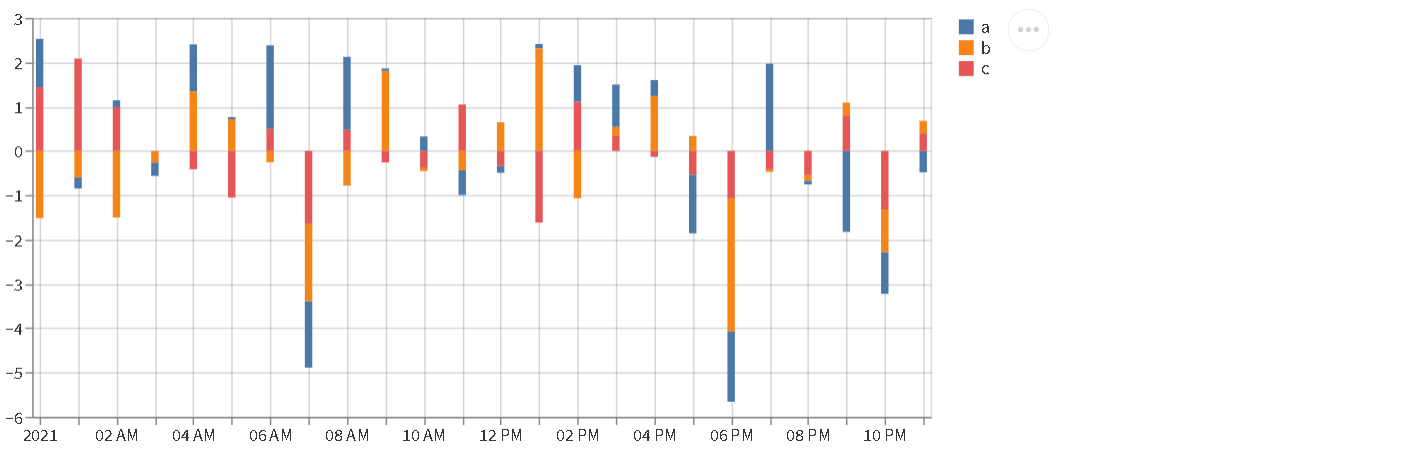

In [ ]:
# http://seaborn.pydata.org/examples/
# https://matplotlib.org/stable/gallery/

fig = plt.figure()
sns.scatterplot(
    data=df2, x='displacement', y='horsepower',
    hue='cylinders', size='cylinders', palette='Set2'
)
st.pyplot(fig)

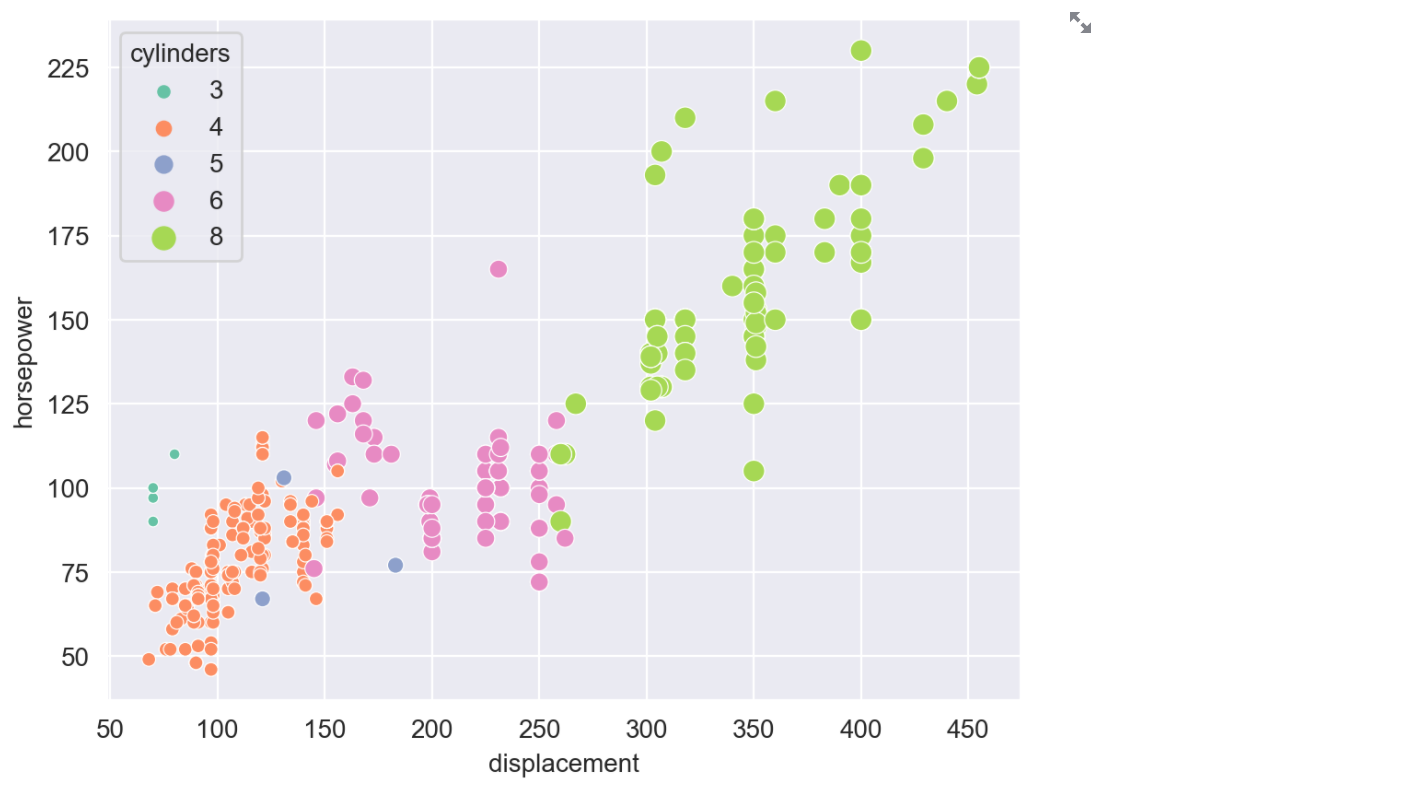

In [ ]:
# https://altair-viz.github.io/gallery/

chart = alt.Chart(df2).mark_circle().encode(
    x='displacement', y='horsepower', color='cylinders',
    size='cylinders', tooltip=['displacement', 'horsepower', 'cylinders']
)
st.altair_chart(chart, use_container_width=True)

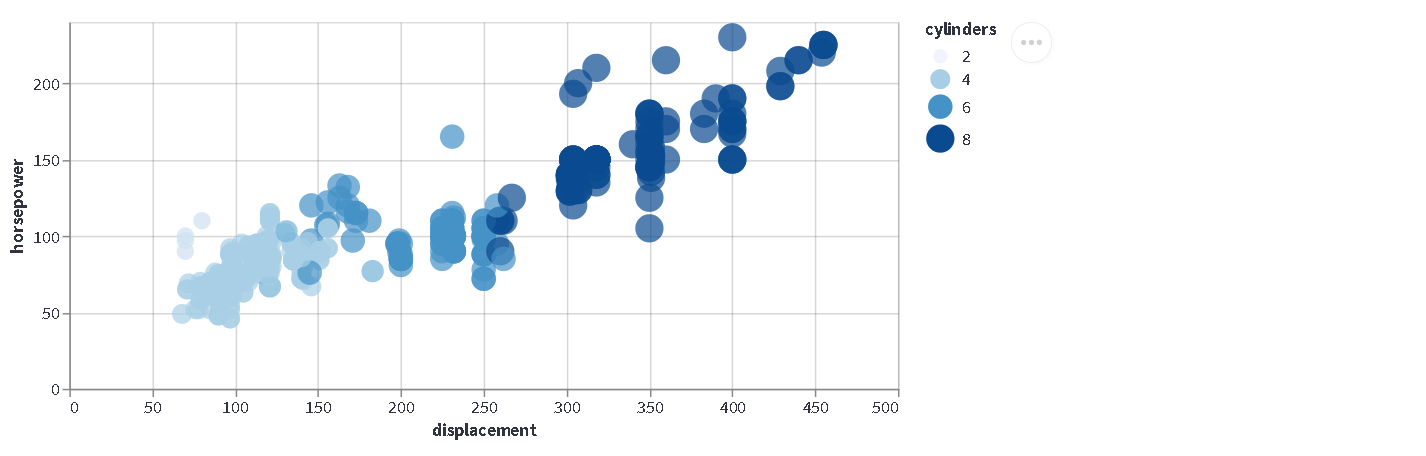

In [ ]:
# https://vega.github.io/vega-lite/examples/

spec = {
    'mark': {'type': 'circle', 'tooltip': True},
    'encoding': {
        'x': {'field': 'displacement', 'type': 'quantitative'},
        'y': {'field': 'horsepower', 'type': 'quantitative'},
         'size': {'field': 'cylinders', 'type': 'quantitative'},
         'color': {'field': 'cylinders', 'type': 'quantitative'},
    },
}
st.vega_lite_chart(df2, spec, use_container_width=True)

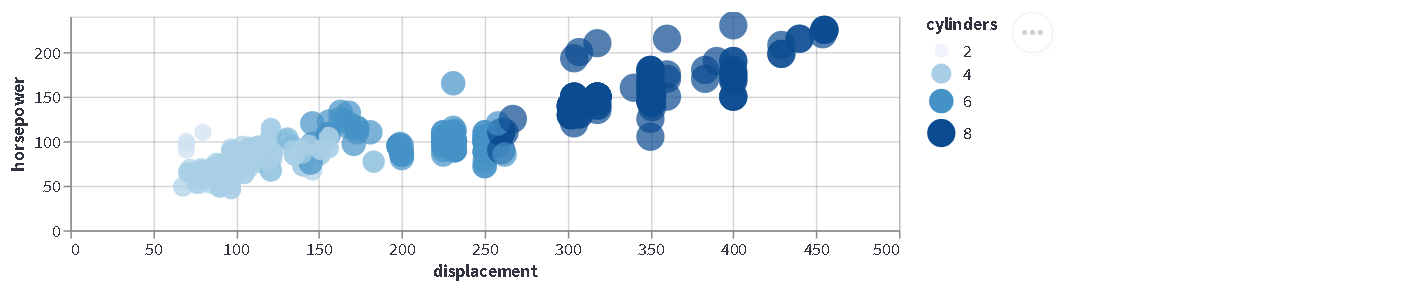

In [ ]:
# https://plotly.com/chart-studio/

fig = ff.create_distplot([df3[c] for c in df3.columns], df3.columns, bin_size=[.1, .25, .5])
st.plotly_chart(fig, use_container_width=True)

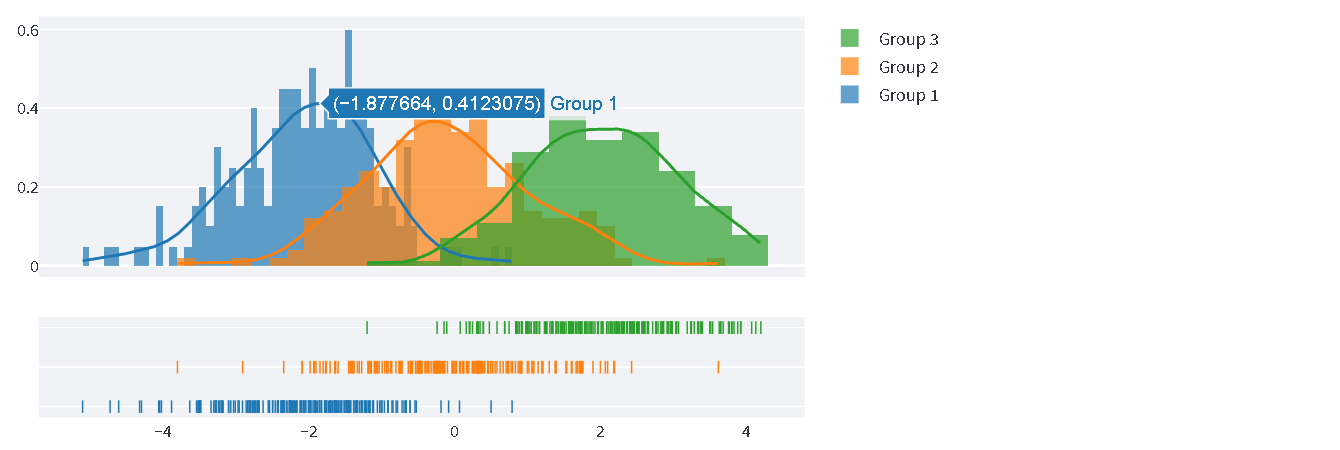

In [ ]:
# https://graphviz.org/gallery/

# --- First Method
st.graphviz_chart('''
    digraph {
        run -> intr
        intr -> runbl
        runbl -> run
        run -> kernel
        kernel -> zombie
        kernel -> sleep
        kernel -> runmem
        sleep -> swap
    }
''')

# --- Second Method
# import graphviz as graphviz
# graph = graphviz.Digraph()
# graph.edge('run', 'intr')
# graph.edge('intr', 'runbl')
# graph.edge('runbl', 'run')
# graph.edge('run', 'kernel')
# graph.edge('kernel', 'zombie')
# graph.edge('kernel', 'sleep')
# graph.edge('kernel', 'runmem')
# graph.edge('sleep', 'swap')
# st.graphviz_chart(graph)

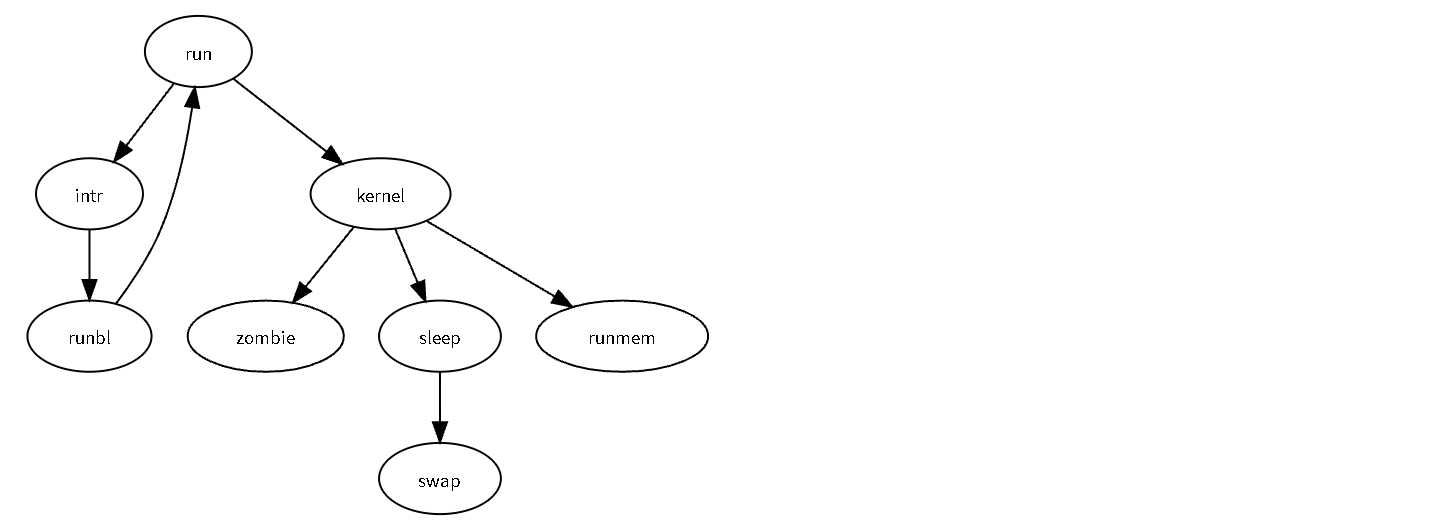

## Media

In [ ]:
st.image('streamlit.jpg', caption='Streamlit Logo')

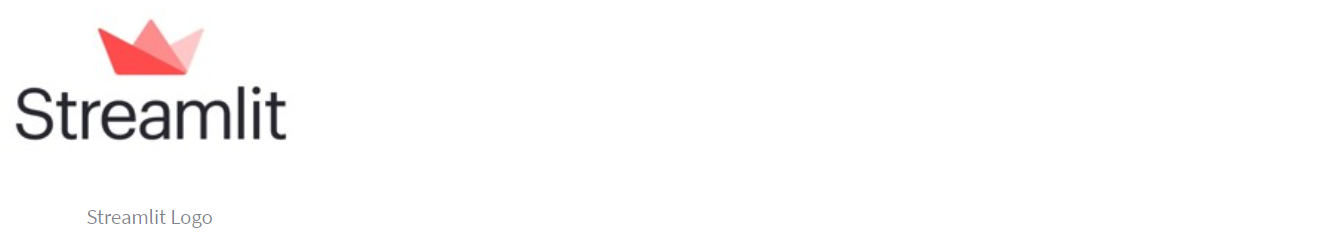

In [ ]:
st.video('streamlit.mp4')

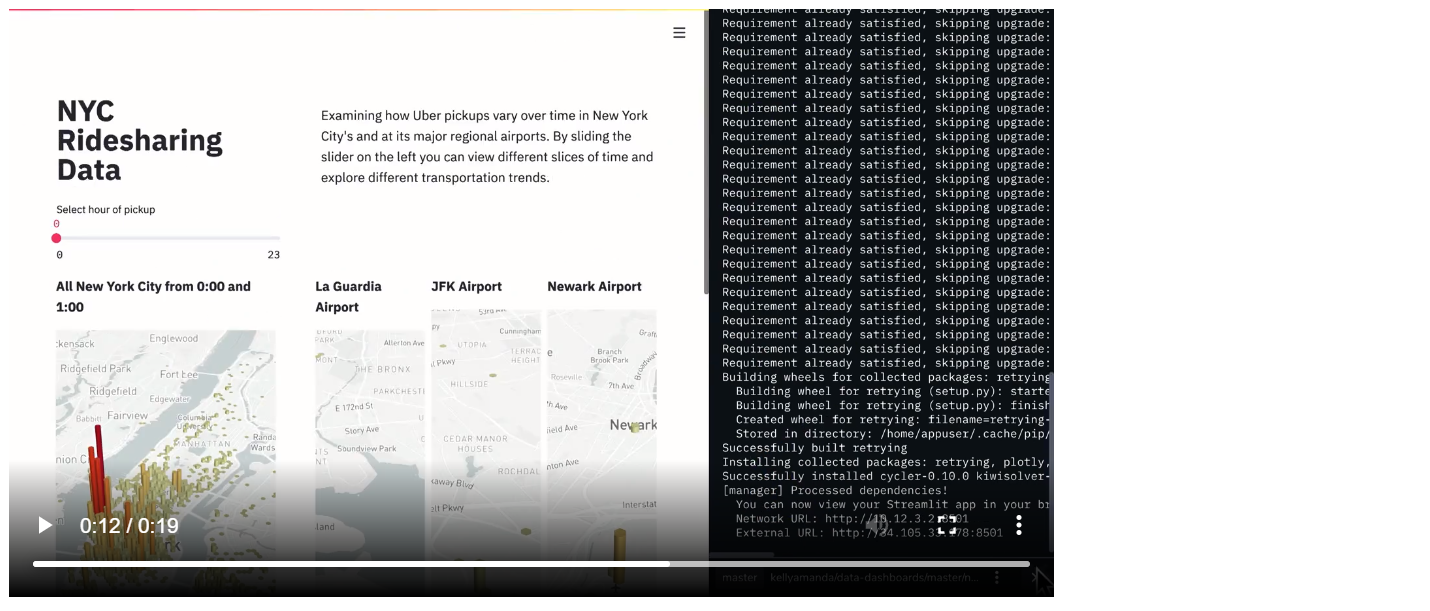

In [ ]:
st.audio('streamlit.mp3')

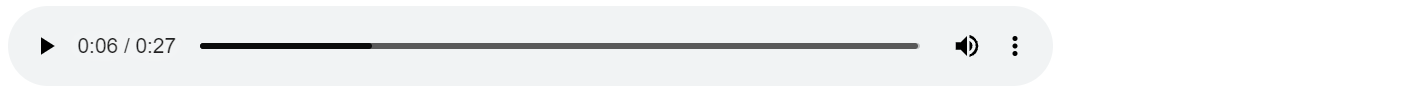

## Layout

In [ ]:
col1, col2 = st.columns(2)
col1.text_input('Column 1')
col2.text_input('Column 2')

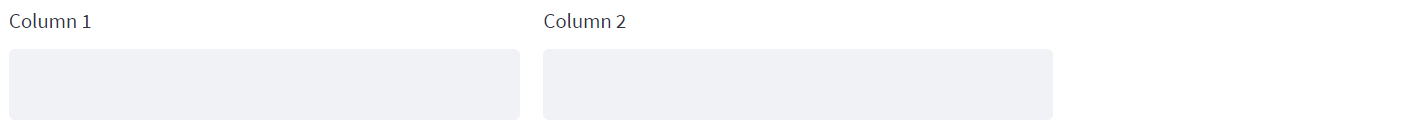

In [ ]:
with st.expander('Expand'):
    st.write('Text to be shown after expansion')

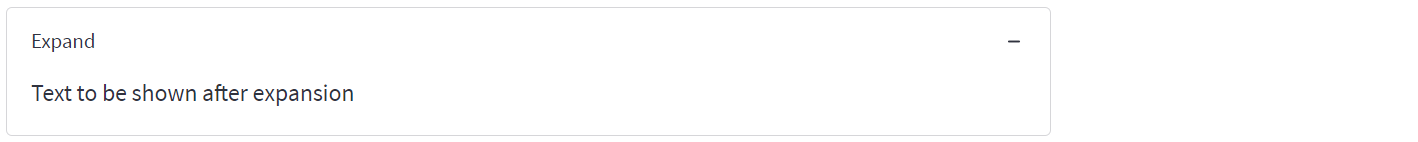

In [ ]:
st.sidebar.write('Display any widget except `echo` and `spinner` in the sidebar')

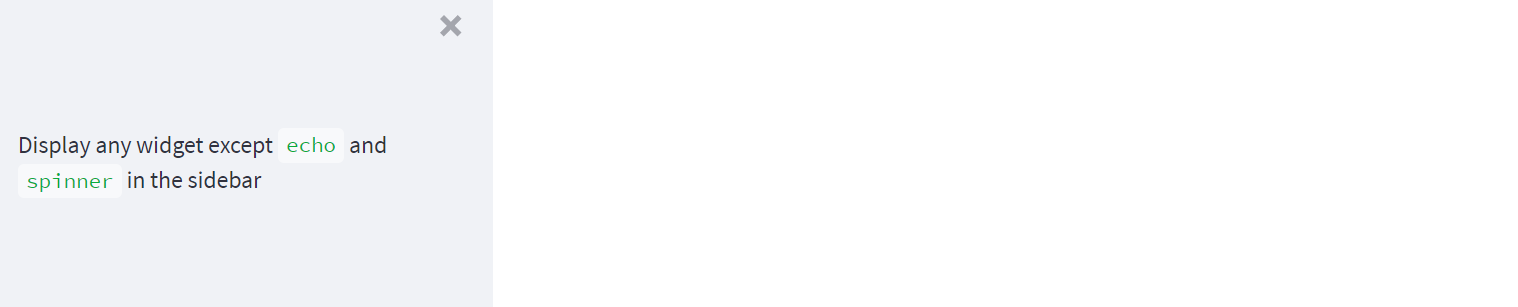

In [ ]:
# use form to organize widgets and run callback after submission
with st.form(key='my_form'):
    st.slider('My slider', 0, 10, 5, key='slider_key')
    st.form_submit_button(
        label='Submit',
        on_click=lambda: st.write(st.session_state.slider_key)
    )

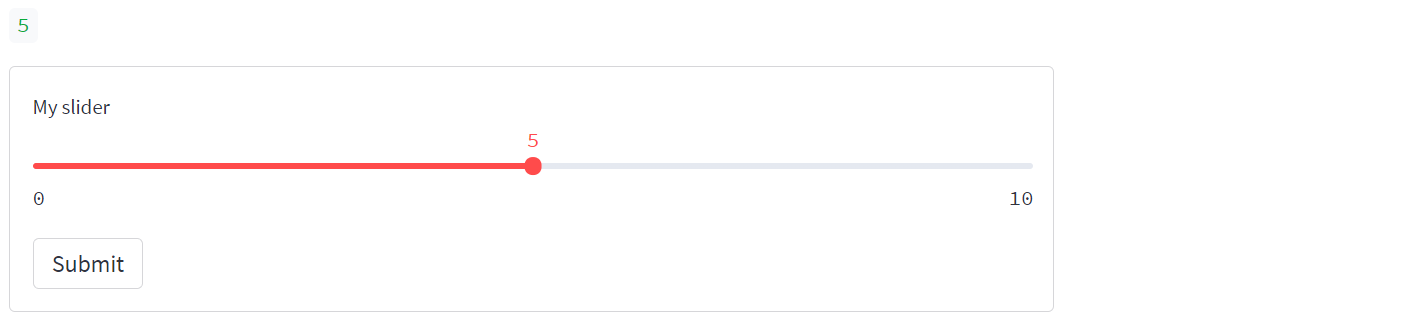

In [ ]:
# prevent the following lines from execution
st.stop()
st.write("This won't be displayed")